<a href="https://colab.research.google.com/github/matbmotta/evasao_escolar_supervisionado/blob/main/Evasao_Supervisionado2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Árvores de Decisão**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de um aluno se tornar evadido com base em alguns fatores acadêmicos e sociais. 

Os dados foram extraídos do portal https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados . Para este estudo serão considerados os anos de 2012, 2013, 2014, 2015 e 2016.

# Pré-processamento

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lendo os datasets previamente limpos

In [3]:
m12 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_12.csv')
m13 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_13.csv')
m14 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_14.csv')
m15 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_15.csv')
m16 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_16.csv')

In [ ]:
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
m12['Ano']=2012
m13['Ano']=2013
m14['Ano']=2014
m15['Ano']=2015
m16['Ano']=2016

Concatenando os datasets em um único

In [ ]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [ ]:
evasao.head()

,ID,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,...,Tipo_turma_Não se aplica,Tipo_turma_Unidade prisional,Localizacao_Rural,Localizacao_Urbana,Administracao_Federal,Administracao_Municipal,Administracao_Privada,Ano,Sexo_M,Unificada_Multietapa
0,1.100036e+11,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
1,1.100110e+11,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
2,1.100167e+11,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
3,1.100174e+11,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,1,0,2012,NaN,NaN
4,1.100192e+11,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,1,2012,NaN,NaN


Listando as colunas do dataset

In [ ]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Unificada_Multietapa']

In [ ]:
evasao.shape

(829709, 43)

#Transformando as variáveis categóricas nominais em variáveis categóricas ordinais

In [ ]:
evasao2 = pd.DataFrame.copy(evasao)

In [ ]:
evasao2['Status'].replace({'repetente':0, 'aprovado': 0, 'evadido': 1}, inplace=True)

In [ ]:
evasao2.drop(columns=['ID',
 'ID_escola',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Unificada_Multietapa'], inplace=True)

In [ ]:
evasao2.head()

,Idade,Superdotacao,Etapa_ensino,Status,Etnia_Branca,Etnia_Indígena,Etnia_Não Declarada,Etnia_Parda,Etnia_Preta
0,13.0,0.0,8.0,0,0,0,0,1,0
1,14.0,0.0,6.0,1,1,0,0,0,0
2,12.0,0.0,7.0,0,1,0,0,0,0
3,12.0,0.0,5.0,1,1,0,0,0,0
4,11.0,0.0,6.0,0,0,0,1,0,0


In [ ]:
evasao2.dtypes

Idade                  float64
Superdotacao           float64
Etapa_ensino           float64
Status                   int64
Etnia_Branca             int64
Etnia_Indígena           int64
Etnia_Não Declarada      int64
Etnia_Parda              int64
Etnia_Preta              int64
dtype: object

In [ ]:
evasao2.shape

(829709, 9)

# Atributos previsores e alvo

In [ ]:
previsores = evasao2.iloc[:, 0:11].values

In [ ]:
previsores

array([[13.,  0.,  8., ...,  0.,  1.,  0.],
       [14.,  0.,  6., ...,  0.,  0.,  0.],
       [12.,  0.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 6.,  0.,  1., ...,  0.,  0.,  0.],
       [ 7.,  0.,  2., ...,  0.,  0.,  0.],
       [ 6.,  0.,  1., ...,  0.,  0.,  0.]])

In [ ]:
previsores.shape

(829709, 9)

In [ ]:
alvo = evasao2.iloc[:, 8].values

In [ ]:
alvo

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
alvo.shape

(829709,)

# Análise das escalas dos atributos (Escalonamento)

alvo = variável que se pretende atingir (evadido ou não).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

Padronização

In [ ]:
evasao2.describe()

,Idade,Superdotacao,Etapa_ensino,Status,Etnia_Branca,Etnia_Indígena,Etnia_Não Declarada,Etnia_Parda,Etnia_Preta
count,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000
mean,10.066539,0.000833,4.630772,0.081774,0.646578,0.000958,0.238241,0.098819,0.010495
std,2.670104,0.028847,2.328576,0.274021,0.478032,0.030939,0.426008,0.298419,0.101907
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[ 1.09863237, -0.02887068,  1.44690578, ..., -0.55924213,
         3.01985316, -0.10298818],
       [ 1.47314983, -0.02887068,  0.58801129, ..., -0.55924213,
        -0.33114193, -0.10298818],
       [ 0.72411491, -0.02887068,  1.01745854, ..., -0.55924213,
        -0.33114193, -0.10298818],
       ...,
       [-1.52298986, -0.02887068, -1.55922492, ..., -0.55924213,
        -0.33114193, -0.10298818],
       [-1.1484724 , -0.02887068, -1.12977767, ..., -0.55924213,
        -0.33114193, -0.10298818],
       [-1.52298986, -0.02887068, -1.55922492, ..., -0.55924213,
        -0.33114193, -0.10298818]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8
0,1.098632,-0.028871,1.446906,-0.298424,-1.352584,-0.030969,-0.559242,3.019853,-0.102988
1,1.473150,-0.028871,0.588011,3.350934,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
2,0.724115,-0.028871,1.017459,-0.298424,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
3,0.724115,-0.028871,0.158564,3.350934,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
4,0.349597,-0.028871,0.588011,-0.298424,-1.352584,-0.030969,1.788134,-0.331142,-0.102988
...,...,...,...,...,...,...,...,...,...
829704,-0.399437,-0.028871,-0.700330,-0.298424,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
829705,-0.399437,-0.028871,-0.270883,-0.298424,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
829706,-1.522990,-0.028871,-1.559225,-0.298424,0.739326,-0.030969,-0.559242,-0.331142,-0.102988
829707,-1.148472,-0.028871,-1.129778,3.350934,0.739326,-0.030969,-0.559242,-0.331142,-0.102988


# Bases de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.1, random_state = 0)

In [ ]:
x_treino.shape

(746738, 9)

In [ ]:
x_teste.shape

(82971, 9)

In [ ]:
y_treino.shape

(746738,)

In [ ]:
y_teste.shape

(82971,)

# Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.75, 'X[8] <= 4.803\nentropy = 0.084\nsamples = 746738\nvalue = [738880, 7858]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 738880\nvalue = [738880, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 7858\nvalue = [0, 7858]')]

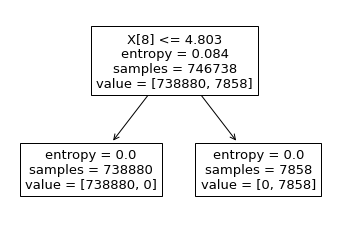

In [ ]:
tree.plot_tree(_arvore)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_teste

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 100.00%


In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[82121,     0],
       [    0,   850]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82121
           1       1.00      1.00      1.00       850

    accuracy                           1.00     82971
   macro avg       1.00      1.00      1.00     82971
weighted avg       1.00      1.00      1.00     82971



Análise dados de treino

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 100.00%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[738880,      0],
       [     0,   7858]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_teste

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 100.00%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[82121,     0],
       [    0,   850]])

In [ ]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82121
           1       1.00      1.00      1.00       850

    accuracy                           1.00     82971
   macro avg       1.00      1.00      1.00     82971
weighted avg       1.00      1.00      1.00     82971



Análise dados de treino

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[738880,      0],
       [     0,   7858]])

# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=1500, penalty="l2",
                               tol=0.0001, C=2,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=1500, random_state=1)

In [ ]:
logistica.intercept_

array([-15.25106525])

In [ ]:
logistica.coef_

array([[ 1.54610249e-03, -1.23351245e-04, -2.26454516e-02,
         1.37446939e-02, -3.29657928e-01, -1.06076685e-02,
        -1.77801004e-01, -1.10805705e-01,  2.64067245e+00]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 100.00%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[82121,     0],
       [    0,   850]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82121
           1       1.00      1.00      1.00       850

    accuracy                           1.00     82971
   macro avg       1.00      1.00      1.00     82971
weighted avg       1.00      1.00      1.00     82971



Análise dos dados de treino

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[738880,      0],
       [     0,   7858]])